# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-06 11:34:43.373620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

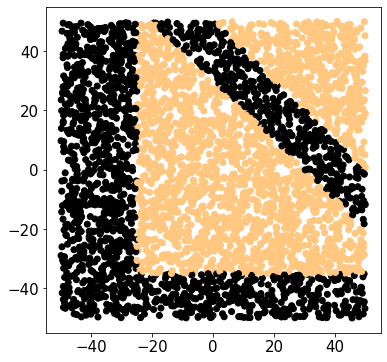

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

<function matplotlib.pyplot.show(close=None, block=None)>

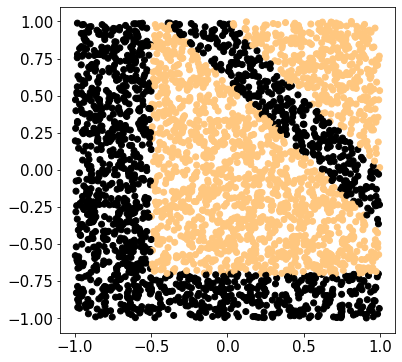

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

plt.figure(figsize = (6,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

### Define the model with Keras / Tensorflow

In [5]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))        
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.001))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=1000
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2

2023-03-06 11:34:57.385953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [11]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/1000
64/64 - 0s - loss: 0.0177 - accuracy: 0.9928 - val_loss: 0.0374 - val_accuracy: 0.9850 - 85ms/epoch - 1ms/step
Epoch 2/1000
64/64 - 0s - loss: 0.0138 - accuracy: 0.9947 - val_loss: 0.0261 - val_accuracy: 0.9875 - 63ms/epoch - 983us/step
Epoch 3/1000
64/64 - 0s - loss: 0.0205 - accuracy: 0.9919 - val_loss: 0.0260 - val_accuracy: 0.9875 - 65ms/epoch - 1ms/step
Epoch 4/1000
64/64 - 0s - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0542 - val_accuracy: 0.9775 - 61ms/epoch - 956us/step
Epoch 5/1000
64/64 - 0s - loss: 0.0313 - accuracy: 0.9878 - val_loss: 0.0366 - val_accuracy: 0.9887 - 60ms/epoch - 932us/step
Epoch 6/1000
64/64 - 0s - loss: 0.0297 - accuracy: 0.9878 - val_loss: 0.0207 - val_accuracy: 0.9875 - 59ms/epoch - 926us/step
Epoch 7/1000
64/64 - 0s - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0245 - val_accuracy: 0.9900 - 60ms/epoch - 935us/step
Epoch 8/1000
64/64 - 0s - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0217 - val_accuracy: 0.9912 - 64ms/epoch - 1ms/ste

Epoch 66/1000
64/64 - 0s - loss: 0.0170 - accuracy: 0.9934 - val_loss: 0.0268 - val_accuracy: 0.9850 - 63ms/epoch - 982us/step
Epoch 67/1000
64/64 - 0s - loss: 0.0143 - accuracy: 0.9937 - val_loss: 0.0245 - val_accuracy: 0.9887 - 62ms/epoch - 974us/step
Epoch 68/1000
64/64 - 0s - loss: 0.0149 - accuracy: 0.9941 - val_loss: 0.0381 - val_accuracy: 0.9837 - 61ms/epoch - 957us/step
Epoch 69/1000
64/64 - 0s - loss: 0.0215 - accuracy: 0.9906 - val_loss: 0.0257 - val_accuracy: 0.9887 - 60ms/epoch - 931us/step
Epoch 70/1000
64/64 - 0s - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0427 - val_accuracy: 0.9850 - 59ms/epoch - 915us/step
Epoch 71/1000
64/64 - 0s - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.0245 - val_accuracy: 0.9875 - 58ms/epoch - 913us/step
Epoch 72/1000
64/64 - 0s - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0306 - val_accuracy: 0.9837 - 59ms/epoch - 917us/step
Epoch 73/1000
64/64 - 0s - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0308 - val_accuracy: 0.9862 - 59ms/epo

Epoch 131/1000
64/64 - 0s - loss: 0.0156 - accuracy: 0.9919 - val_loss: 0.0197 - val_accuracy: 0.9912 - 60ms/epoch - 932us/step
Epoch 132/1000
64/64 - 0s - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.0294 - val_accuracy: 0.9887 - 59ms/epoch - 923us/step
Epoch 133/1000
64/64 - 0s - loss: 0.0120 - accuracy: 0.9950 - val_loss: 0.0462 - val_accuracy: 0.9862 - 59ms/epoch - 916us/step
Epoch 134/1000
64/64 - 0s - loss: 0.0146 - accuracy: 0.9937 - val_loss: 0.0304 - val_accuracy: 0.9875 - 59ms/epoch - 923us/step
Epoch 135/1000
64/64 - 0s - loss: 0.0162 - accuracy: 0.9934 - val_loss: 0.0331 - val_accuracy: 0.9900 - 59ms/epoch - 914us/step
Epoch 136/1000
64/64 - 0s - loss: 0.0353 - accuracy: 0.9884 - val_loss: 0.0327 - val_accuracy: 0.9875 - 59ms/epoch - 914us/step
Epoch 137/1000
64/64 - 0s - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.0564 - val_accuracy: 0.9800 - 58ms/epoch - 911us/step
Epoch 138/1000
64/64 - 0s - loss: 0.0182 - accuracy: 0.9916 - val_loss: 0.0460 - val_accuracy: 0.9862 - 

64/64 - 0s - loss: 0.0171 - accuracy: 0.9922 - val_loss: 0.0268 - val_accuracy: 0.9900 - 60ms/epoch - 941us/step
Epoch 196/1000
64/64 - 0s - loss: 0.0174 - accuracy: 0.9928 - val_loss: 0.0280 - val_accuracy: 0.9850 - 59ms/epoch - 914us/step
Epoch 197/1000
64/64 - 0s - loss: 0.0146 - accuracy: 0.9934 - val_loss: 0.0618 - val_accuracy: 0.9762 - 58ms/epoch - 905us/step
Epoch 198/1000
64/64 - 0s - loss: 0.0413 - accuracy: 0.9841 - val_loss: 0.0449 - val_accuracy: 0.9837 - 58ms/epoch - 906us/step
Epoch 199/1000
64/64 - 0s - loss: 0.0208 - accuracy: 0.9909 - val_loss: 0.0284 - val_accuracy: 0.9912 - 59ms/epoch - 917us/step
Epoch 200/1000
64/64 - 0s - loss: 0.0145 - accuracy: 0.9944 - val_loss: 0.0302 - val_accuracy: 0.9887 - 58ms/epoch - 913us/step
Epoch 201/1000
64/64 - 0s - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0191 - val_accuracy: 0.9937 - 59ms/epoch - 923us/step
Epoch 202/1000
64/64 - 0s - loss: 0.0125 - accuracy: 0.9953 - val_loss: 0.0292 - val_accuracy: 0.9875 - 59ms/epoch - 91

Epoch 260/1000
64/64 - 0s - loss: 0.0184 - accuracy: 0.9925 - val_loss: 0.0400 - val_accuracy: 0.9812 - 60ms/epoch - 935us/step
Epoch 261/1000
64/64 - 0s - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0392 - val_accuracy: 0.9800 - 74ms/epoch - 1ms/step
Epoch 262/1000
64/64 - 0s - loss: 0.0222 - accuracy: 0.9906 - val_loss: 0.0329 - val_accuracy: 0.9875 - 57ms/epoch - 897us/step
Epoch 263/1000
64/64 - 0s - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0288 - val_accuracy: 0.9900 - 58ms/epoch - 909us/step
Epoch 264/1000
64/64 - 0s - loss: 0.0183 - accuracy: 0.9912 - val_loss: 0.0533 - val_accuracy: 0.9775 - 58ms/epoch - 910us/step
Epoch 265/1000
64/64 - 0s - loss: 0.0224 - accuracy: 0.9909 - val_loss: 0.0343 - val_accuracy: 0.9837 - 58ms/epoch - 909us/step
Epoch 266/1000
64/64 - 0s - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.0285 - val_accuracy: 0.9900 - 58ms/epoch - 905us/step
Epoch 267/1000
64/64 - 0s - loss: 0.0205 - accuracy: 0.9903 - val_loss: 0.0648 - val_accuracy: 0.9812 - 59

64/64 - 0s - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.0402 - val_accuracy: 0.9850 - 59ms/epoch - 925us/step
Epoch 325/1000
64/64 - 0s - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.0298 - val_accuracy: 0.9875 - 58ms/epoch - 903us/step
Epoch 326/1000
64/64 - 0s - loss: 0.0208 - accuracy: 0.9900 - val_loss: 0.0455 - val_accuracy: 0.9800 - 58ms/epoch - 906us/step
Epoch 327/1000
64/64 - 0s - loss: 0.0287 - accuracy: 0.9887 - val_loss: 0.0700 - val_accuracy: 0.9787 - 58ms/epoch - 902us/step
Epoch 328/1000
64/64 - 0s - loss: 0.0265 - accuracy: 0.9881 - val_loss: 0.0333 - val_accuracy: 0.9875 - 59ms/epoch - 917us/step
Epoch 329/1000
64/64 - 0s - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0579 - val_accuracy: 0.9800 - 57ms/epoch - 895us/step
Epoch 330/1000
64/64 - 0s - loss: 0.0444 - accuracy: 0.9822 - val_loss: 0.0299 - val_accuracy: 0.9837 - 57ms/epoch - 897us/step
Epoch 331/1000
64/64 - 0s - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0330 - val_accuracy: 0.9900 - 59ms/epoch - 91

Epoch 389/1000
64/64 - 0s - loss: 0.0123 - accuracy: 0.9969 - val_loss: 0.0247 - val_accuracy: 0.9900 - 59ms/epoch - 927us/step
Epoch 390/1000
64/64 - 0s - loss: 0.0178 - accuracy: 0.9916 - val_loss: 0.0251 - val_accuracy: 0.9887 - 57ms/epoch - 887us/step
Epoch 391/1000
64/64 - 0s - loss: 0.0190 - accuracy: 0.9916 - val_loss: 0.0357 - val_accuracy: 0.9825 - 57ms/epoch - 893us/step
Epoch 392/1000
64/64 - 0s - loss: 0.0219 - accuracy: 0.9903 - val_loss: 0.0367 - val_accuracy: 0.9837 - 57ms/epoch - 897us/step
Epoch 393/1000
64/64 - 0s - loss: 0.0193 - accuracy: 0.9928 - val_loss: 0.0284 - val_accuracy: 0.9875 - 58ms/epoch - 902us/step
Epoch 394/1000
64/64 - 0s - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0321 - val_accuracy: 0.9900 - 57ms/epoch - 892us/step
Epoch 395/1000
64/64 - 0s - loss: 0.0307 - accuracy: 0.9881 - val_loss: 0.0185 - val_accuracy: 0.9937 - 59ms/epoch - 914us/step
Epoch 396/1000
64/64 - 0s - loss: 0.0201 - accuracy: 0.9919 - val_loss: 0.0263 - val_accuracy: 0.9875 - 

64/64 - 0s - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0314 - val_accuracy: 0.9862 - 60ms/epoch - 931us/step
Epoch 454/1000
64/64 - 0s - loss: 0.0128 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9875 - 59ms/epoch - 926us/step
Epoch 455/1000
64/64 - 0s - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.0360 - val_accuracy: 0.9850 - 59ms/epoch - 917us/step
Epoch 456/1000
64/64 - 0s - loss: 0.0163 - accuracy: 0.9928 - val_loss: 0.0638 - val_accuracy: 0.9825 - 58ms/epoch - 910us/step
Epoch 457/1000
64/64 - 0s - loss: 0.0276 - accuracy: 0.9894 - val_loss: 0.0269 - val_accuracy: 0.9900 - 59ms/epoch - 916us/step
Epoch 458/1000
64/64 - 0s - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0543 - val_accuracy: 0.9862 - 58ms/epoch - 907us/step
Epoch 459/1000
64/64 - 0s - loss: 0.0256 - accuracy: 0.9900 - val_loss: 0.0245 - val_accuracy: 0.9875 - 59ms/epoch - 922us/step
Epoch 460/1000
64/64 - 0s - loss: 0.0130 - accuracy: 0.9953 - val_loss: 0.0191 - val_accuracy: 0.9900 - 59ms/epoch - 92

Epoch 518/1000
64/64 - 0s - loss: 0.0185 - accuracy: 0.9922 - val_loss: 0.0304 - val_accuracy: 0.9875 - 60ms/epoch - 930us/step
Epoch 519/1000
64/64 - 0s - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0311 - val_accuracy: 0.9837 - 58ms/epoch - 913us/step
Epoch 520/1000
64/64 - 0s - loss: 0.0226 - accuracy: 0.9919 - val_loss: 0.0347 - val_accuracy: 0.9862 - 58ms/epoch - 900us/step
Epoch 521/1000
64/64 - 0s - loss: 0.0283 - accuracy: 0.9891 - val_loss: 0.0237 - val_accuracy: 0.9900 - 58ms/epoch - 910us/step
Epoch 522/1000
64/64 - 0s - loss: 0.0149 - accuracy: 0.9922 - val_loss: 0.0472 - val_accuracy: 0.9850 - 58ms/epoch - 905us/step
Epoch 523/1000
64/64 - 0s - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0396 - val_accuracy: 0.9837 - 58ms/epoch - 913us/step
Epoch 524/1000
64/64 - 0s - loss: 0.0361 - accuracy: 0.9872 - val_loss: 0.0373 - val_accuracy: 0.9875 - 59ms/epoch - 925us/step
Epoch 525/1000
64/64 - 0s - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0360 - val_accuracy: 0.9850 - 

64/64 - 0s - loss: 0.0224 - accuracy: 0.9916 - val_loss: 0.0515 - val_accuracy: 0.9825 - 60ms/epoch - 944us/step
Epoch 583/1000
64/64 - 0s - loss: 0.0197 - accuracy: 0.9922 - val_loss: 0.0237 - val_accuracy: 0.9875 - 59ms/epoch - 928us/step
Epoch 584/1000
64/64 - 0s - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0224 - val_accuracy: 0.9875 - 59ms/epoch - 919us/step
Epoch 585/1000
64/64 - 0s - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.0764 - val_accuracy: 0.9775 - 58ms/epoch - 912us/step
Epoch 586/1000
64/64 - 0s - loss: 0.0227 - accuracy: 0.9897 - val_loss: 0.0197 - val_accuracy: 0.9875 - 59ms/epoch - 915us/step
Epoch 587/1000
64/64 - 0s - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0293 - val_accuracy: 0.9887 - 58ms/epoch - 903us/step
Epoch 588/1000
64/64 - 0s - loss: 0.0248 - accuracy: 0.9906 - val_loss: 0.0432 - val_accuracy: 0.9875 - 58ms/epoch - 913us/step
Epoch 589/1000
64/64 - 0s - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0267 - val_accuracy: 0.9887 - 59ms/epoch - 92

Epoch 647/1000
64/64 - 0s - loss: 0.0130 - accuracy: 0.9950 - val_loss: 0.0261 - val_accuracy: 0.9912 - 62ms/epoch - 972us/step
Epoch 648/1000
64/64 - 0s - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0255 - val_accuracy: 0.9900 - 59ms/epoch - 929us/step
Epoch 649/1000
64/64 - 0s - loss: 0.0124 - accuracy: 0.9956 - val_loss: 0.0241 - val_accuracy: 0.9900 - 61ms/epoch - 955us/step
Epoch 650/1000
64/64 - 0s - loss: 0.0146 - accuracy: 0.9941 - val_loss: 0.0398 - val_accuracy: 0.9887 - 61ms/epoch - 948us/step
Epoch 651/1000
64/64 - 0s - loss: 0.0326 - accuracy: 0.9869 - val_loss: 0.0310 - val_accuracy: 0.9887 - 60ms/epoch - 942us/step
Epoch 652/1000
64/64 - 0s - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0518 - val_accuracy: 0.9837 - 61ms/epoch - 946us/step
Epoch 653/1000
64/64 - 0s - loss: 0.0398 - accuracy: 0.9866 - val_loss: 0.0501 - val_accuracy: 0.9800 - 60ms/epoch - 945us/step
Epoch 654/1000
64/64 - 0s - loss: 0.0155 - accuracy: 0.9941 - val_loss: 0.0242 - val_accuracy: 0.9900 - 

64/64 - 0s - loss: 0.0171 - accuracy: 0.9931 - val_loss: 0.0205 - val_accuracy: 0.9925 - 60ms/epoch - 935us/step
Epoch 712/1000
64/64 - 0s - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0368 - val_accuracy: 0.9800 - 58ms/epoch - 905us/step
Epoch 713/1000
64/64 - 0s - loss: 0.0164 - accuracy: 0.9931 - val_loss: 0.0251 - val_accuracy: 0.9875 - 58ms/epoch - 912us/step
Epoch 714/1000
64/64 - 0s - loss: 0.0199 - accuracy: 0.9916 - val_loss: 0.0218 - val_accuracy: 0.9900 - 58ms/epoch - 904us/step
Epoch 715/1000
64/64 - 0s - loss: 0.0165 - accuracy: 0.9941 - val_loss: 0.0234 - val_accuracy: 0.9900 - 58ms/epoch - 909us/step
Epoch 716/1000
64/64 - 0s - loss: 0.0207 - accuracy: 0.9925 - val_loss: 0.0342 - val_accuracy: 0.9850 - 58ms/epoch - 914us/step
Epoch 717/1000
64/64 - 0s - loss: 0.0262 - accuracy: 0.9875 - val_loss: 0.0338 - val_accuracy: 0.9900 - 58ms/epoch - 912us/step
Epoch 718/1000
64/64 - 0s - loss: 0.0274 - accuracy: 0.9897 - val_loss: 0.0208 - val_accuracy: 0.9912 - 58ms/epoch - 91

Epoch 776/1000
64/64 - 0s - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0281 - val_accuracy: 0.9912 - 60ms/epoch - 941us/step
Epoch 777/1000
64/64 - 0s - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0470 - val_accuracy: 0.9850 - 58ms/epoch - 908us/step
Epoch 778/1000
64/64 - 0s - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0280 - val_accuracy: 0.9900 - 57ms/epoch - 898us/step
Epoch 779/1000
64/64 - 0s - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0227 - val_accuracy: 0.9887 - 58ms/epoch - 906us/step
Epoch 780/1000
64/64 - 0s - loss: 0.0196 - accuracy: 0.9919 - val_loss: 0.0458 - val_accuracy: 0.9862 - 59ms/epoch - 923us/step
Epoch 781/1000
64/64 - 0s - loss: 0.0162 - accuracy: 0.9937 - val_loss: 0.0184 - val_accuracy: 0.9925 - 57ms/epoch - 898us/step
Epoch 782/1000
64/64 - 0s - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.0190 - val_accuracy: 0.9912 - 59ms/epoch - 916us/step
Epoch 783/1000
64/64 - 0s - loss: 0.0129 - accuracy: 0.9944 - val_loss: 0.0235 - val_accuracy: 0.9912 - 

64/64 - 0s - loss: 0.0115 - accuracy: 0.9950 - val_loss: 0.0215 - val_accuracy: 0.9925 - 60ms/epoch - 932us/step
Epoch 841/1000
64/64 - 0s - loss: 0.0239 - accuracy: 0.9903 - val_loss: 0.0314 - val_accuracy: 0.9862 - 59ms/epoch - 918us/step
Epoch 842/1000
64/64 - 0s - loss: 0.0218 - accuracy: 0.9906 - val_loss: 0.0513 - val_accuracy: 0.9825 - 58ms/epoch - 904us/step
Epoch 843/1000
64/64 - 0s - loss: 0.0170 - accuracy: 0.9922 - val_loss: 0.0235 - val_accuracy: 0.9887 - 59ms/epoch - 924us/step
Epoch 844/1000
64/64 - 0s - loss: 0.0156 - accuracy: 0.9931 - val_loss: 0.0220 - val_accuracy: 0.9887 - 59ms/epoch - 918us/step
Epoch 845/1000
64/64 - 0s - loss: 0.0176 - accuracy: 0.9934 - val_loss: 0.0233 - val_accuracy: 0.9900 - 58ms/epoch - 907us/step
Epoch 846/1000
64/64 - 0s - loss: 0.0123 - accuracy: 0.9947 - val_loss: 0.0257 - val_accuracy: 0.9900 - 58ms/epoch - 905us/step
Epoch 847/1000
64/64 - 0s - loss: 0.0097 - accuracy: 0.9962 - val_loss: 0.0238 - val_accuracy: 0.9862 - 59ms/epoch - 92

Epoch 905/1000
64/64 - 0s - loss: 0.0150 - accuracy: 0.9944 - val_loss: 0.0152 - val_accuracy: 0.9962 - 61ms/epoch - 950us/step
Epoch 906/1000
64/64 - 0s - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0182 - val_accuracy: 0.9925 - 59ms/epoch - 920us/step
Epoch 907/1000
64/64 - 0s - loss: 0.0186 - accuracy: 0.9922 - val_loss: 0.0319 - val_accuracy: 0.9912 - 59ms/epoch - 918us/step
Epoch 908/1000
64/64 - 0s - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0230 - val_accuracy: 0.9900 - 59ms/epoch - 927us/step
Epoch 909/1000
64/64 - 0s - loss: 0.0386 - accuracy: 0.9862 - val_loss: 0.0401 - val_accuracy: 0.9875 - 59ms/epoch - 918us/step
Epoch 910/1000
64/64 - 0s - loss: 0.0192 - accuracy: 0.9922 - val_loss: 0.0226 - val_accuracy: 0.9875 - 59ms/epoch - 918us/step
Epoch 911/1000
64/64 - 0s - loss: 0.0139 - accuracy: 0.9944 - val_loss: 0.0258 - val_accuracy: 0.9875 - 59ms/epoch - 915us/step
Epoch 912/1000
64/64 - 0s - loss: 0.0179 - accuracy: 0.9916 - val_loss: 0.0235 - val_accuracy: 0.9912 - 

64/64 - 0s - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0251 - val_accuracy: 0.9900 - 61ms/epoch - 946us/step
Epoch 970/1000
64/64 - 0s - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0266 - val_accuracy: 0.9900 - 59ms/epoch - 921us/step
Epoch 971/1000
64/64 - 0s - loss: 0.0162 - accuracy: 0.9937 - val_loss: 0.0257 - val_accuracy: 0.9912 - 59ms/epoch - 928us/step
Epoch 972/1000
64/64 - 0s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0192 - val_accuracy: 0.9937 - 59ms/epoch - 914us/step
Epoch 973/1000
64/64 - 0s - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.0288 - val_accuracy: 0.9875 - 58ms/epoch - 911us/step
Epoch 974/1000
64/64 - 0s - loss: 0.0165 - accuracy: 0.9934 - val_loss: 0.0276 - val_accuracy: 0.9862 - 59ms/epoch - 920us/step
Epoch 975/1000
64/64 - 0s - loss: 0.0125 - accuracy: 0.9953 - val_loss: 0.0276 - val_accuracy: 0.9875 - 58ms/epoch - 911us/step
Epoch 976/1000
64/64 - 0s - loss: 0.0194 - accuracy: 0.9903 - val_loss: 0.0380 - val_accuracy: 0.9875 - 59ms/epoch - 92

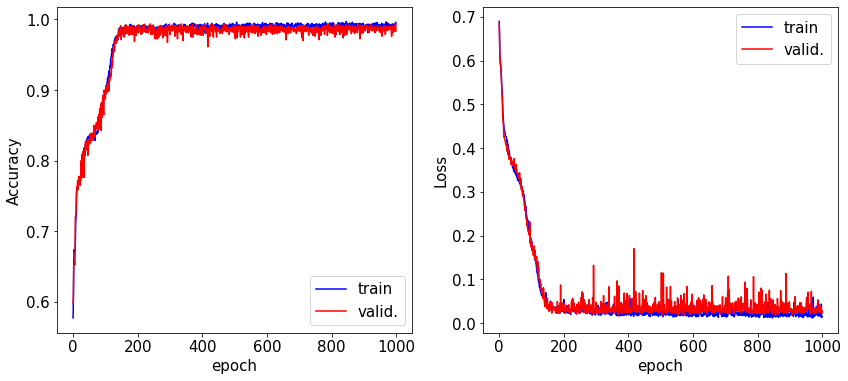

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [9]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 464us/step


<function matplotlib.pyplot.show(close=None, block=None)>

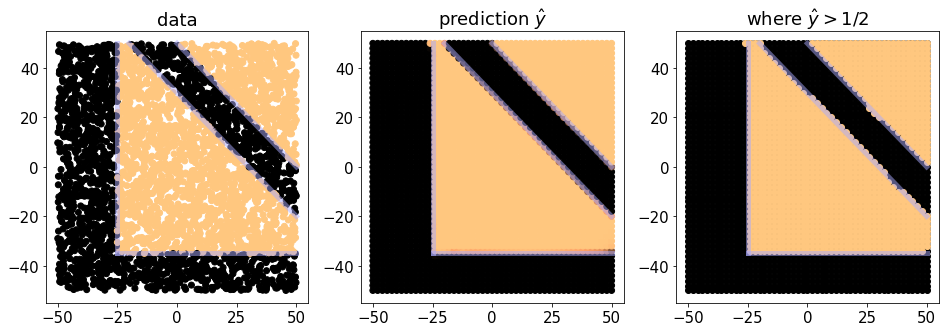

In [10]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show